## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import tensorflow.keras as keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

50000/50000 [==============================] - 2s 44us/sample - loss: 0.9071 - accuracy: 0.6735 - val_loss: 1.8534 - val_accuracy: 0.4564
Epoch 49/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.8973 - accuracy: 0.6743 - val_loss: 1.7527 - val_accuracy: 0.4872
Epoch 50/50
50000/50000 [==============================] - 2s 44us/sample - loss: 0.8936 - accuracy: 0.6783 - val_loss: 1.7737 - val_accuracy: 0.4771
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 2s 44us/sample - loss: 0.7580 - accuracy: 0.7341 - val_loss: 1.5173 - val_accuracy: 0.5264
Epoch 46/50
50000/50000 [==============================] - 2s 44us/sample - loss: 0.7349 - accuracy: 0.7423 - val_loss: 1.5794 - val_accuracy: 0.5125
Epoch 47/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.7227 - accuracy: 0.7481 - val_loss: 1.5770 - val_accuracy: 0.5109
Epoch 48/50
50000/50000 [==============================] - 2s 44us/sample - loss: 0.7021 - accuracy: 0.7545 - val_loss: 1.5013 - val_accuracy: 0.5243
Epoch 49/50
50000/50000 [==============================] - 2s 44us/sample - loss: 0.6781 - accuracy: 0.7635 - val_loss: 1.7262 - val_accuracy: 0.4864
Epoch 50/50
50000/50000 [==============================] - 2s 44us/sample - loss: 0.6646 - accuracy: 0.7680 - val_loss: 1.5691 - val_accuracy: 0.5247
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
L

50000/50000 [==============================] - 2s 43us/sample - loss: 1.3835 - accuracy: 0.5174 - val_loss: 1.4536 - val_accuracy: 0.4860
Epoch 43/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.3760 - accuracy: 0.5174 - val_loss: 1.4560 - val_accuracy: 0.4806
Epoch 44/50
50000/50000 [==============================] - 2s 44us/sample - loss: 1.3691 - accuracy: 0.5204 - val_loss: 1.4436 - val_accuracy: 0.4835
Epoch 45/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.3643 - accuracy: 0.5243 - val_loss: 1.4526 - val_accuracy: 0.4811
Epoch 46/50
50000/50000 [==============================] - 2s 44us/sample - loss: 1.3575 - accuracy: 0.5254 - val_loss: 1.4415 - val_accuracy: 0.4927
Epoch 47/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.3512 - accuracy: 0.5286 - val_loss: 1.4261 - val_accuracy: 0.4908
Epoch 48/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.3441 - accuracy: 0.5311 - va

50000/50000 [==============================] - 2s 44us/sample - loss: 1.8181 - accuracy: 0.3612 - val_loss: 1.8214 - val_accuracy: 0.3616
Epoch 40/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.8145 - accuracy: 0.3630 - val_loss: 1.8176 - val_accuracy: 0.3622
Epoch 41/50
50000/50000 [==============================] - 2s 44us/sample - loss: 1.8111 - accuracy: 0.3646 - val_loss: 1.8140 - val_accuracy: 0.3642
Epoch 42/50
50000/50000 [==============================] - 2s 44us/sample - loss: 1.8077 - accuracy: 0.3656 - val_loss: 1.8110 - val_accuracy: 0.3661
Epoch 43/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.8045 - accuracy: 0.3667 - val_loss: 1.8075 - val_accuracy: 0.3665
Epoch 44/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.8012 - accuracy: 0.3684 - val_loss: 1.8044 - val_accuracy: 0.3680
Epoch 45/50
50000/50000 [==============================] - 2s 44us/sample - loss: 1.7979 - accuracy: 0.3695 - va

50000/50000 [==============================] - 2s 44us/sample - loss: 2.1815 - accuracy: 0.2198 - val_loss: 2.1832 - val_accuracy: 0.2160
Epoch 37/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.1788 - accuracy: 0.2210 - val_loss: 2.1806 - val_accuracy: 0.2183
Epoch 38/50
50000/50000 [==============================] - 2s 44us/sample - loss: 2.1762 - accuracy: 0.2228 - val_loss: 2.1781 - val_accuracy: 0.2182
Epoch 39/50
50000/50000 [==============================] - 2s 44us/sample - loss: 2.1736 - accuracy: 0.2240 - val_loss: 2.1756 - val_accuracy: 0.2188
Epoch 40/50
50000/50000 [==============================] - 2s 44us/sample - loss: 2.1710 - accuracy: 0.2256 - val_loss: 2.1731 - val_accuracy: 0.2208
Epoch 41/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.1685 - accuracy: 0.2266 - val_loss: 2.1706 - val_accuracy: 0.2221
Epoch 42/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.1660 - accuracy: 0.2277 - va

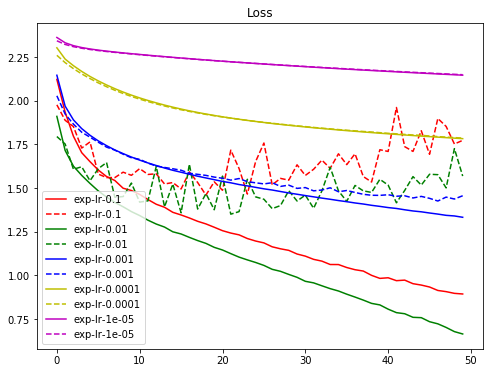

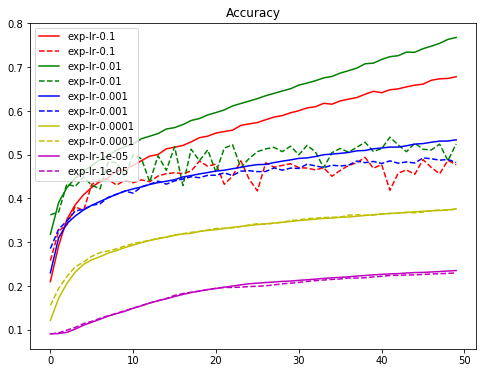

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

50000/50000 [==============================] - 2s 44us/sample - loss: 0.9836 - accuracy: 0.6469 - val_loss: 1.6922 - val_accuracy: 0.4773
Epoch 49/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.9734 - accuracy: 0.6477 - val_loss: 1.8513 - val_accuracy: 0.4578
Epoch 50/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.9627 - accuracy: 0.6519 - val_loss: 1.6905 - val_accuracy: 0.4862
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 2s 43us/sample - loss: 0.7456 - accuracy: 0.7374 - val_loss: 1.4769 - val_accuracy: 0.5409
Epoch 46/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.7310 - accuracy: 0.7434 - val_loss: 2.4567 - val_accuracy: 0.3920
Epoch 47/50
50000/50000 [==============================] - 2s 42us/sample - loss: 0.7729 - accuracy: 0.7300 - val_loss: 1.6200 - val_accuracy: 0.4916
Epoch 48/50
50000/50000 [==============================] - 2s 42us/sample - loss: 0.7076 - accuracy: 0.7520 - val_loss: 1.5424 - val_accuracy: 0.5206
Epoch 49/50
50000/50000 [==============================] - 2s 43us/sample - loss: 0.6966 - accuracy: 0.7553 - val_loss: 1.6044 - val_accuracy: 0.5222
Epoch 50/50
50000/50000 [==============================] - 2s 42us/sample - loss: 0.6811 - accuracy: 0.7602 - val_loss: 1.4924 - val_accuracy: 0.5334
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
L

50000/50000 [==============================] - 2s 42us/sample - loss: 1.3825 - accuracy: 0.5155 - val_loss: 1.4716 - val_accuracy: 0.4782
Epoch 43/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.3756 - accuracy: 0.5193 - val_loss: 1.4925 - val_accuracy: 0.4706
Epoch 44/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.3699 - accuracy: 0.5213 - val_loss: 1.4505 - val_accuracy: 0.4830
Epoch 45/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.3636 - accuracy: 0.5229 - val_loss: 1.4524 - val_accuracy: 0.4836
Epoch 46/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.3586 - accuracy: 0.5253 - val_loss: 1.4361 - val_accuracy: 0.4868
Epoch 47/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.3514 - accuracy: 0.5279 - val_loss: 1.4387 - val_accuracy: 0.4954
Epoch 48/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.3463 - accuracy: 0.5298 - va

50000/50000 [==============================] - 2s 42us/sample - loss: 1.8241 - accuracy: 0.3639 - val_loss: 1.8258 - val_accuracy: 0.3693
Epoch 40/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.8201 - accuracy: 0.3653 - val_loss: 1.8222 - val_accuracy: 0.3718
Epoch 41/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.8164 - accuracy: 0.3681 - val_loss: 1.8184 - val_accuracy: 0.3718
Epoch 42/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.8125 - accuracy: 0.3681 - val_loss: 1.8147 - val_accuracy: 0.3746
Epoch 43/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.8088 - accuracy: 0.3699 - val_loss: 1.8112 - val_accuracy: 0.3741
Epoch 44/50
50000/50000 [==============================] - 2s 42us/sample - loss: 1.8052 - accuracy: 0.3709 - val_loss: 1.8080 - val_accuracy: 0.3727
Epoch 45/50
50000/50000 [==============================] - 2s 43us/sample - loss: 1.8017 - accuracy: 0.3720 - va

50000/50000 [==============================] - 2s 42us/sample - loss: 2.1897 - accuracy: 0.2140 - val_loss: 2.1904 - val_accuracy: 0.2178
Epoch 37/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.1872 - accuracy: 0.2163 - val_loss: 2.1879 - val_accuracy: 0.2181
Epoch 38/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.1846 - accuracy: 0.2181 - val_loss: 2.1854 - val_accuracy: 0.2204
Epoch 39/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.1821 - accuracy: 0.2188 - val_loss: 2.1829 - val_accuracy: 0.2231
Epoch 40/50
50000/50000 [==============================] - 2s 43us/sample - loss: 2.1796 - accuracy: 0.2212 - val_loss: 2.1804 - val_accuracy: 0.2250
Epoch 41/50
50000/50000 [==============================] - 2s 42us/sample - loss: 2.1771 - accuracy: 0.2227 - val_loss: 2.1780 - val_accuracy: 0.2273
Epoch 42/50
50000/50000 [==============================] - 2s 42us/sample - loss: 2.1746 - accuracy: 0.2246 - va

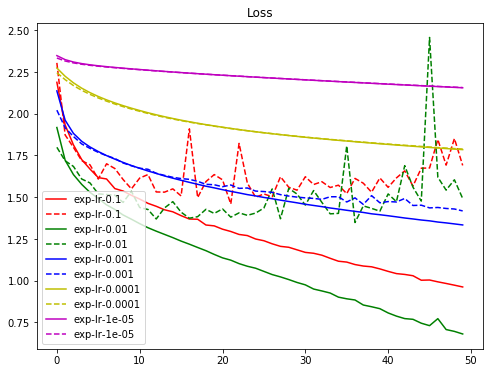

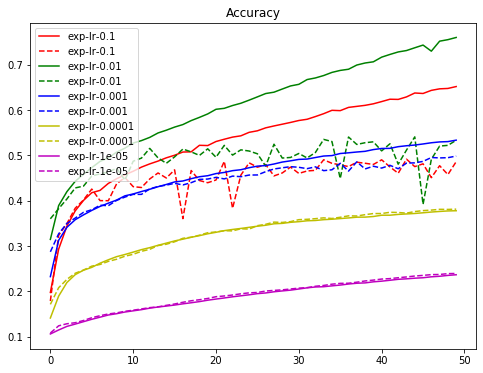

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()